<a href="https://colab.research.google.com/github/Wycology/deep_learning_course/blob/main/1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SATELLITE DATA FOR AGRICULTURAL ECONOMISTS**


**THEORY AND PRACTICE**

**_MACHINE & DEEP LEARNING_**


*David Wuepper, Hadi Hadi, Wyclife Agumba Oluoch*

---

# **Background**


---


This is one of the best moments for any geospatial data scientist due to the following:


1.   Ploriferation of **infinite satellite data** of high resolution
2.   Emergence of **advanced machine learning techniques**, especially in deep learning subfield.

These are two powerful scenarios that has seen geospatial datascience grow rapidly and help save the world in many spheres including:


*   Vegetation mapping (assessing yield, damage, encroachment)
*   Disaster response (time series analysis of pre-and-post hazard)
*   Forest mapping
*   Flood mapping
*   Crop phenology mapping, among others  



## **Who is this course for?**


---


This is a very basic introduction to deep learning, specifically using pytorch for geospatial analysis. As such, it is suited for individuals interested in using deep learning tools using geospatial data. It is developed with people who have never interacted with deep learning in mind, however, it can also be useful to advanced users who want to refresh their minds.

## **Introduction to pytorch**

In order to do deep learning projects in this course we need a library. We chose pytorch as it is open source, free, easy to use, and pre-installed on Google Colab among other benefits. It is one of the most popular, if not the most popular, deep learning Python libraries in the world.
It is developed and maintained by meta, formerly Facebook. Additional reasons for using pytorch include:


*   It is popular
*   Supported by all major cloud platforms such GCP, AWS, Microsoft Azure, and Alibaba Cloud
*   Supported by Google Colab and Kaggle kernels
*   Mature and stable
*   Runs on CPUs, GPUs and TPUs
*   Supports deployment to production



## **Running pytorch**

One can run pytorch in their local machines, in google colab, and cloud based services. In this course, we use unpaid version of Google colab.

In [1]:
import torch # With this code, we will have pytorch ready to work

Since pytorch is natively installed in Google colab, we do not have to worry about installing it. We simply import it and we are ready to use it. First we will check its version.

In [2]:
print(torch.__version__) # This prints the latest version of torch loaded.

2.5.1+cu124


If you want to run pytorch in your local machine, then beware to ensure **compatibility between cuda and the pytorch version** you are using. Otherwise it will not run, especially when calling for GPU.

## **CUDA GPU**

For most of deep learning projects, you will need a GPU. The free version of GPU on Google Colab is limited in time and memory. There is limited amount of work you can achieve with it. However, if you have local GPU or paid versions in cloud based services, then well and good. To check if there is linkage between the cuda and pytorch installed, run the following code.

In [4]:
print(torch.cuda.is_available()) # Currently returns False because we have not enabled GPU.

False


To enable the GPU in Google Colab, go to **Runtime** ==> **Change runtime type** ==> **Runtine type** Python 3 ==> **Hardware accelerator** T4 GPU ==> Ok

**NOTE**:
*I will only recommend that you do that after ensuring that your code is working and ready to run the model. If you enable GPU and not utilizing it, you are running out of time.*

Therefore, for now, let us proceed with CPU.

## **Fun example**
---

In this example, we are going to download an image and use a pretrained model to predict what the image is. Pretrained model is a model that has been trained on very many (huge amount) of data hence should be good at telling what our new image is. This is basically the major purpose of building models; **to make predictions**.

In [5]:
import urllib.request # This will help us to query a url.

Here comes the url that has the image we want to classify

In [7]:
url = 'https://pytorch.tips/coffee' # Path to the image
fpath = 'coffee.jpg' # Name of the image and extention
urllib.request.urlretrieve(url, fpath) # Querying the image and adding it to path.

('coffee.jpg', <http.client.HTTPMessage at 0x7f436228f950>)

With that simple code, if you check on the left and click on the icon called Files, you will be able to see a file called coffee.jpg. That is the file that has been downloaded. If you double click it, you can view it on the right of this page. Simply a cup filled with some dark-brown liquid and spoon near it. A better way is to import libraries that can enable us to load and plot the image. Here, both matplotlib and PIL come handy.

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

Now we can go ahead and load the image and plot it.

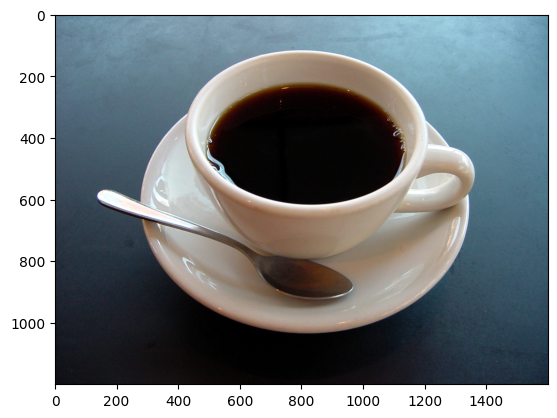

In [10]:
img = Image.open("coffee.jpg") # This is reading the image.
plt.imshow(img) # This is visualizing the image.

Now, to know some attributes of this image, we need to print it. This does not mean we send it to a printer but to use `print` function as follows:

In [12]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1200 at 0x7F4362244190>


Two important things to note in the print output include:


1.   **mode = RGB** (meaning it has 3 channels; red green blue)
2.   **size = 1600*1200** (width has 1600 pixels while height has 1200 pixels)

These kinds of information will become useful throughout the course. For geospatial enthusiasts, remember we can have more bands beyond RGB, for instance NIR, SWIR etc.

## **Preprocessing the image**

We have not used pytorch up to now. To use pytorch to predict this image, we need to prepare the data, a step called preprocessing. This is important to ensure that the data we are passing to the model is in the form and shape expected by the model. For example, we may need to have square image, that is, with pixels on x and y dimensions equal, we may want to normalize the pixel values to range from 0 to 1 and we may want to convert the image from this PIL format to tensor format which is preferred by pytorch as we will see. The image preprocessing steps we are going to take are called *transforms*. These we can get from a package called `torchvision`.

In [13]:
from torchvision import transforms # This brings in most basic transforms we need now.

In [15]:
transform = transforms.Compose([
    transforms.Resize(256),           # Changes the size of image from 1600 * 1200 to 256 * 256
    transforms.CenterCrop(224),       # Crops from center an image of size 224 by 224
    transforms.ToTensor(),            # Converts the image from PIL to tensor
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )                                 # Normalizes the pixel values to range roughly from 0 to 1
])

img_tensor = transform(img)           # Applies the transform to the image

Very interesting. Now we have a tensor object not a PIL image. This tensor object can now be fed into a pretrained model to predict what it could be. In case you are wondering about the mean and standard deviation values used for normalization, these are the same values used with the data used to pretrain the model.Same to `CenterCrop(224)`, that's the same size as the images used to pretrain the model.

In [16]:
print(img_tensor) # This is now a tensor

tensor([[[-0.1143, -0.1143, -0.0972,  ...,  0.3823,  0.4337,  0.4679],
         [-0.0972, -0.1314, -0.1486,  ...,  0.3823,  0.4166,  0.3994],
         [-0.1486, -0.1486, -0.1657,  ...,  0.3823,  0.4166,  0.3994],
         ...,
         [-1.8097, -1.8097, -1.7925,  ..., -1.6042, -1.5357, -1.5357],
         [-1.7754, -1.7754, -1.7583,  ..., -1.4843, -1.4500, -1.5528],
         [-1.7925, -1.7925, -1.7754,  ..., -1.4843, -1.5014, -1.5185]],

        [[ 0.5728,  0.6078,  0.5903,  ...,  1.3957,  1.4482,  1.4482],
         [ 0.5553,  0.5728,  0.5553,  ...,  1.3957,  1.4132,  1.3957],
         [ 0.5553,  0.5203,  0.5028,  ...,  1.3957,  1.4307,  1.4132],
         ...,
         [-1.7031, -1.7031, -1.7381,  ..., -1.1253, -1.1253, -1.1078],
         [-1.7206, -1.7031, -1.7381,  ..., -1.1954, -1.1779, -1.1954],
         [-1.7031, -1.7206, -1.7381,  ..., -1.1429, -1.1779, -1.2479]],

        [[ 1.0888,  1.1237,  1.1411,  ...,  1.9428,  1.9951,  2.0125],
         [ 1.0714,  1.0714,  1.0365,  ...,  1

In [17]:
print(type(img_tensor), img_tensor.shape) # To confirm the type and shape.

<class 'torch.Tensor'> torch.Size([3, 224, 224])


As indicated in the printout, img_tensor is of 3 channels and 224 pixels on width and 224 pixels on height. However, normally, deep learning takes in images in batches or mini-batches. Meaning, several images at the same time. Accordingly, the shape is normally N x C x W x H.



*   N = Number of images in the batch
*   C = Number of channels
*   W = Number of pixels in width
*   H = Number of pixels in height

Now, we have CW and H but not N. So we will add N. In fact, in our case, N should be 1 because we have one image. So, we add a dimension to the tensor to carry this 1. To do so, we use `unsqueeze` function.



In [19]:
batch = img_tensor.unsqueeze(0) # Zero here means it will be the first dimension.
print(batch.shape) # Now it is 1,3,224,224 meaning we now have a batch of 1 image. Normally the batch size is larger.

torch.Size([1, 3, 224, 224])


## **Loading pretrained model**

Now that we have our image preprocessed and in perfect shape to feed into the model for prediction, we need to get the model. Pretrained models are normally accessible via many libraries such as `torchvision`. Here, we show how to access AlexNet model for the prediction task we have.

In [20]:
from torchvision import models
model = models.alexnet(pretrained = True) # Downloads and loads pretrained alexnet model.

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 120MB/s]


Remember, we are going to use an already trained model (pretrained with millions of images). So, we do not need to train it. Now, let us pass our image to it and see what it says about the image.

In [22]:
device = "cuda" if torch.cuda.is_available() else 'cpu' # We use cuda or cpu
print(device)

cpu


For now, we are good with cpu because it is just a single simple fun test. We do not need to enable GPU for this simple one cup prediction task.

In [24]:
model.eval() # Configures the model for inference/prediction task, not training
model.to(device) # Puts the model on device (cpu or gpu)
y = model(batch.to(device)) # Predicts the image from device
print(y.shape) # Prints output.

torch.Size([1, 1000])


Remember, the AlexNet was trained to predict 1000 classes or different targets. cups, dogs, cats, shoes, etc. So, the output has shape of 1, because we had 1 image in the batch, and 1000 because the output range is 1000. We can print y to see what these predictions look like.

In [26]:
print(y)

tensor([[-1.4065e+00,  2.7065e+00,  1.4805e-01, -2.2963e+00,  3.3625e+00,
          1.2473e+00, -2.5209e+00, -6.5918e+00, -4.5714e+00, -4.3921e+00,
         -6.6836e+00, -4.1603e+00,  3.2033e-01, -4.7959e+00, -5.9609e+00,
         -6.7711e+00, -5.2868e+00, -6.5887e+00, -4.4128e+00, -3.3905e+00,
         -5.5378e+00, -4.6182e+00, -2.8081e+00, -5.2987e+00, -7.4697e+00,
         -4.6446e+00, -1.1483e+00,  3.0080e+00, -8.1851e-01,  2.6691e+00,
         -6.2464e+00, -3.5641e+00, -4.6050e+00, -1.5836e+00, -3.2018e+00,
         -1.9044e+00,  1.6136e+00, -2.9056e+00, -2.0658e+00, -5.6961e+00,
         -1.3514e+00, -5.6723e+00, -7.1311e+00, -9.4407e-01,  7.3094e-01,
         -5.7591e+00, -9.9013e-01, -6.1798e+00, -2.6398e+00, -5.3624e+00,
         -5.7886e+00, -8.6537e-01,  4.3704e+00,  1.6125e+00,  8.4433e-01,
         -5.2120e-01, -2.4175e+00, -4.2475e+00, -2.5535e+00,  3.0643e+00,
          2.2815e-01, -4.8261e-01, -5.8938e+00, -2.7008e+00, -2.4638e+00,
          3.3900e-01, -9.4539e-01, -1.

This prints 1000 numbers. Each number shows the likelihood of the image being in that class. This means, the highest value will correspond to the most likely class. For example, since we know our image to be a cup, we can argue that dog class will have lower value than mug class. Like a cup is more similar to a mug than dog. Now, let us find out the winning class.

In [27]:
y_max, index = torch.max(y, 1)

In [31]:
print(index, y_max) # Now we know the winning class is index 967 with a likelihood value of 22.8618

tensor([967]) tensor([22.8618], grad_fn=<MaxBackward0>)


However, we still don't know what the class 967 represents. So, we need to load a file with labels to the indices. Again we will use urllib etc.

In [32]:
url = 'https://pytorch.tips/imagenet-labels'
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)

with open('imagenet_class_labels.txt') as f:
  classes = [line.strip() for line in f.readlines()]

print(classes[967])

967: 'espresso',


Now we know that the model has predicted the cup to be espresso. How accurate was the prediction? Using softmax() function from pytorch, we can convert the output values to probabilities as follows:

In [33]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
print(classes[index[0]], prob[index[0]].item())

967: 'espresso', 87.99553680419922


Now we know the model was 87.99% accurate that the image was espresso. Wondering what were the other likelihoods?

In [34]:
_, indices = torch.sort(y, descending=True)
for idx in indices[0][:5]:
  print(classes[idx], prob[idx].item())

967: 'espresso', 87.99553680419922
968: 'cup', 7.688935279846191
504: 'coffee mug', 3.8615596294403076
925: 'consomme', 0.3512957990169525
960: 'chocolate sauce, chocolate syrup', 0.05007772147655487


## **Summary**

In this section 1, we have introduced deep learning in its most skeleton form we could. We have also shown a simple case of predicting image using pretrained model. Importantly, we managed to preprocess our image prior to making prediction on it, a skill that will be handy henceforth.

## **References**

Papa, Joe. PyTorch pocket reference. " O'Reilly Media, Inc.", 2021.